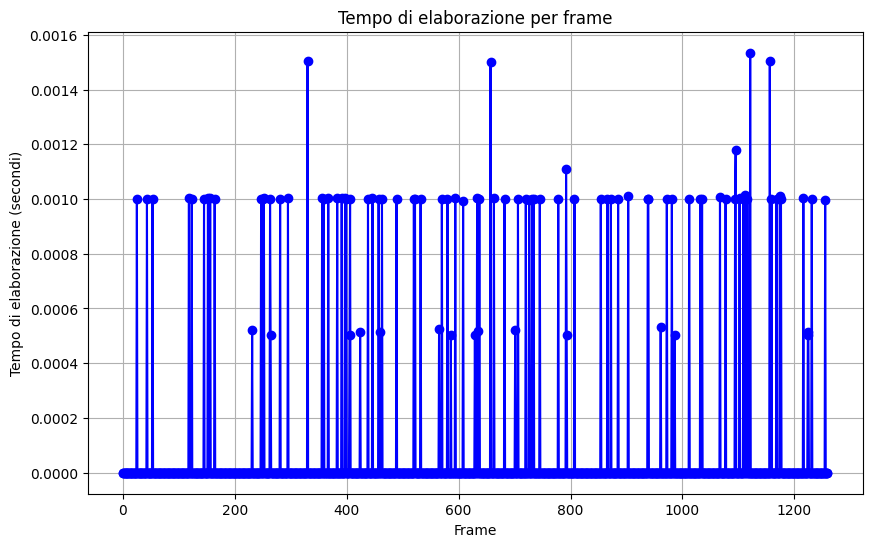

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi i dati dal file CSV
performance_data = pd.read_csv('performance_data.csv')

# Crea un grafico a linee del tempo di elaborazione per ogni frame
plt.figure(figsize=(10, 6))
plt.plot(performance_data['Frame'], performance_data['Processing Time'], marker='o', linestyle='-', color='b')
plt.title('Tempo di elaborazione per frame')
plt.xlabel('Frame')
plt.ylabel('Tempo di elaborazione (secondi)')
plt.grid(True)
plt.show()

In [2]:
import pandas as pd

# Leggi i dati dal file CSV
performance_data = pd.read_csv('performance_data_all.csv')

# Calcola la latenza media per frame in millisecondi
latenza_media = performance_data['Processing Time'].mean() * 1000  # Converti da secondi a millisecondi
print(f"Latenza media per frame: {latenza_media:.2f} ms")


Latenza media per frame: 119.52 ms


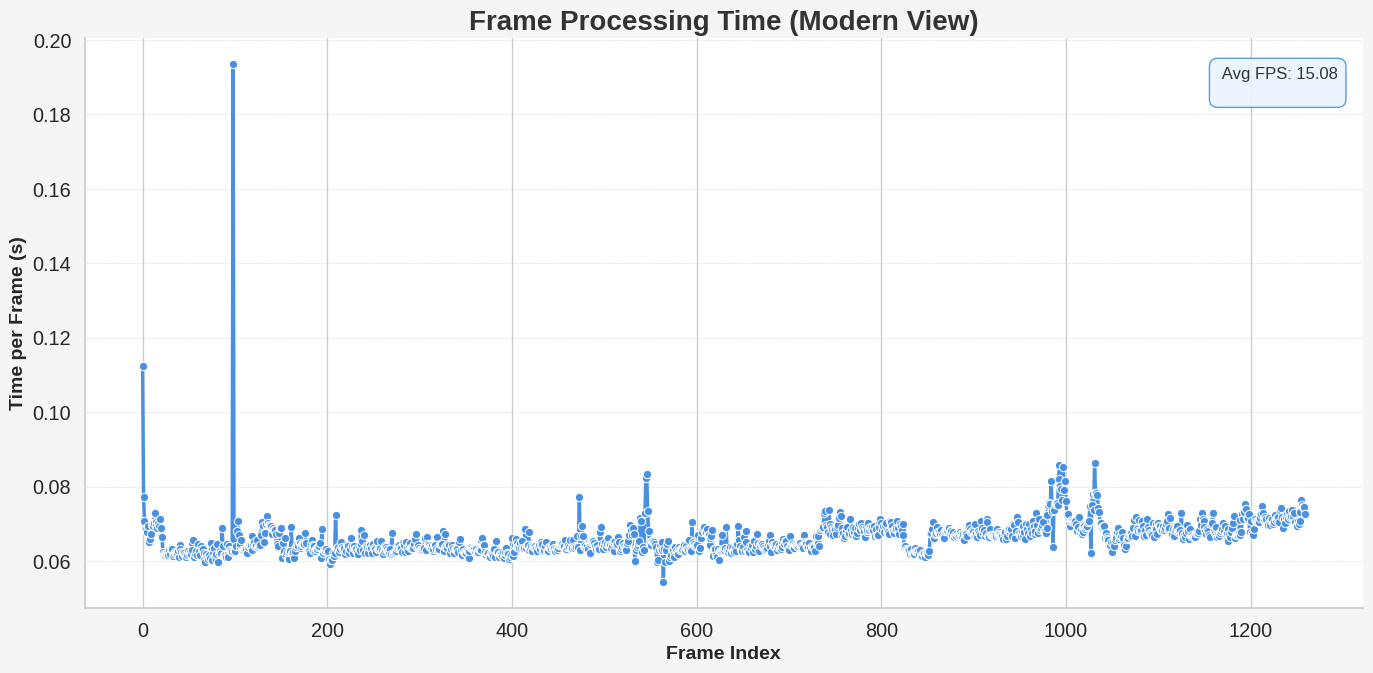

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Stile super moderno (tipo dashboard)
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("coolwarm")
sns.set_context("notebook", font_scale=1.3)

# Caricamento dati
performance_data = pd.read_csv('performance_data_video.csv')

# Calcoli
media_tempo = performance_data['Processing Time'].mean()
fps = 1 / media_tempo
tempo_totale = performance_data['Processing Time'].sum()

# 🧠 Grafico
fig, ax = plt.subplots(figsize=(14, 7), facecolor='#f5f5f5')
line = sns.lineplot(
    data=performance_data,
    x='Frame',
    y='Processing Time',
    ax=ax,
    linewidth=2.5,
    marker='o',
    markersize=6,
    color='#4A90E2'
)

# 🎨 Personalizzazioni
ax.set_title("Frame Processing Time (Modern View)", fontsize=20, weight='bold', color="#333")
ax.set_xlabel("Frame Index", fontsize=14, weight='bold')
ax.set_ylabel("Time per Frame (s)", fontsize=14, weight='bold')
ax.set_facecolor("#ffffff")

# 💡 FPS Annotation Box
ax.text(0.98, 0.95,
        f" Avg FPS: {fps:.2f}\n",
        verticalalignment='top',
        horizontalalignment='right',
        transform=ax.transAxes,
        bbox=dict(boxstyle="round,pad=0.5", fc="#eaf4ff", ec="#4A90E2", alpha=0.9),
        fontsize=12,
        color="#333")

# Griglia moderna e pulita
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rende il layout più compatto
plt.tight_layout()
plt.show()


Frame per secondo (FPS): 15.11
Tempo totale di elaborazione: 83.39 secondi
Tempo totale di elaborazione: 1.39 minuti


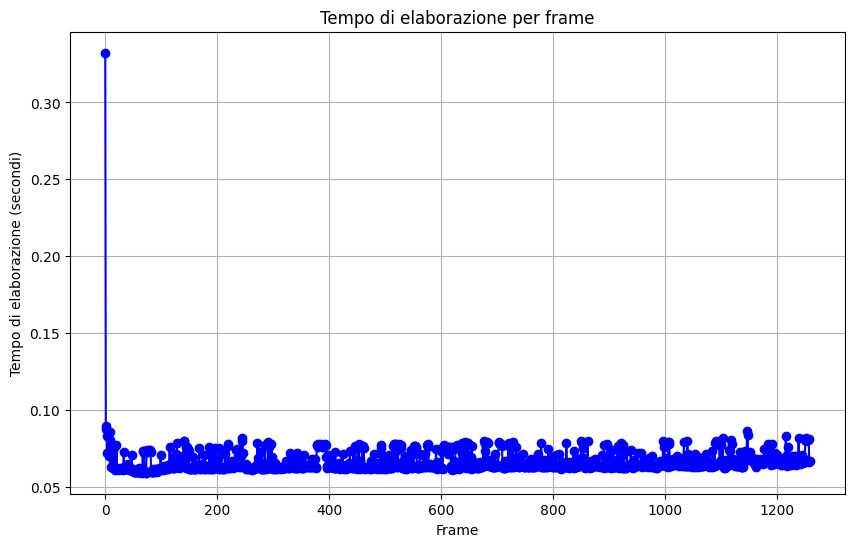

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi i dati dal file CSV
performance_data = pd.read_csv('performance_data_all.csv')

# Calcola il tempo medio di elaborazione per frame
media_tempo = performance_data['Processing Time'].mean()

# Calcola FPS
fps = 1 / media_tempo
print(f"Frame per secondo (FPS): {fps:.2f}")

# Calcola il tempo totale di elaborazione in secondi
tempo_totale = performance_data['Processing Time'].sum()
print(f"Tempo totale di elaborazione: {tempo_totale:.2f} secondi")
print(f"Tempo totale di elaborazione: {tempo_totale / 60:.2f} minuti")
# Crea un grafico a linee del tempo di elaborazione per ogni frame
plt.figure(figsize=(10, 6))
plt.plot(performance_data['Frame'], performance_data['Processing Time'], marker='o', linestyle='-', color='b')
plt.title('Tempo di elaborazione per frame')
plt.xlabel('Frame')
plt.ylabel('Tempo di elaborazione (secondi)')
plt.grid(True)
plt.show()


Frame per secondo (FPS): 23.08
Tempo totale di elaborazione: 31.59 secondi
Tempo totale di elaborazione: 0.53 minuti


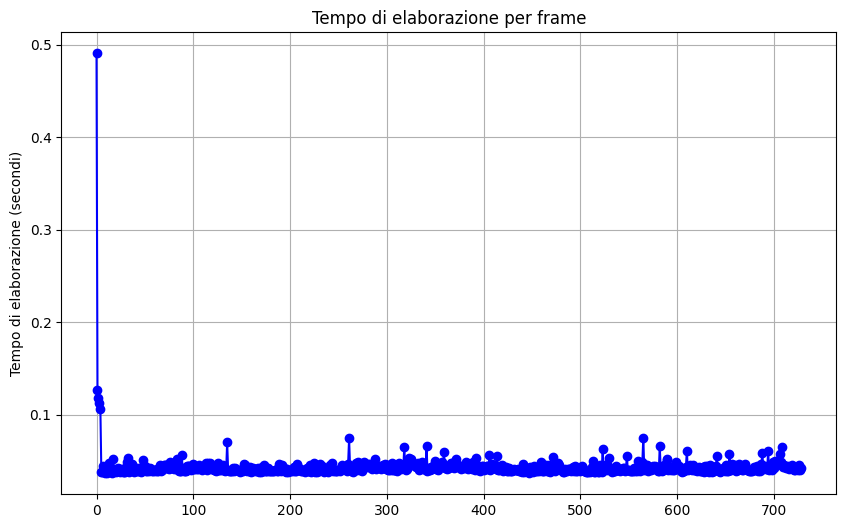

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi i dati dal file CSV
performance_data = pd.read_csv('performance_data_all.csv')

# Calcola il tempo medio di elaborazione per frame
media_tempo = performance_data['Processing Time'].mean()

# Calcola FPS
fps = 1 / media_tempo
print(f"Frame per secondo (FPS): {fps:.2f}")

# Calcola il tempo totale di elaborazione in secondi
tempo_totale = performance_data['Processing Time'].sum()
print(f"Tempo totale di elaborazione: {tempo_totale:.2f} secondi")
print(f"Tempo totale di elaborazione: {tempo_totale / 60:.2f} minuti")
# Crea un grafico a linee del tempo di elaborazione per ogni frame
plt.figure(figsize=(10, 6))
plt.plot(performance_data['Frame'], performance_data['Processing Time'], marker='o', linestyle='-', color='b')
plt.title('Tempo di elaborazione per frame')
plt.ylabel('Tempo di elaborazione (secondi)')
plt.grid(True)
plt.show()
#18.12

Accuratezza media: 0.6444
Deviazione standard: 0.3022


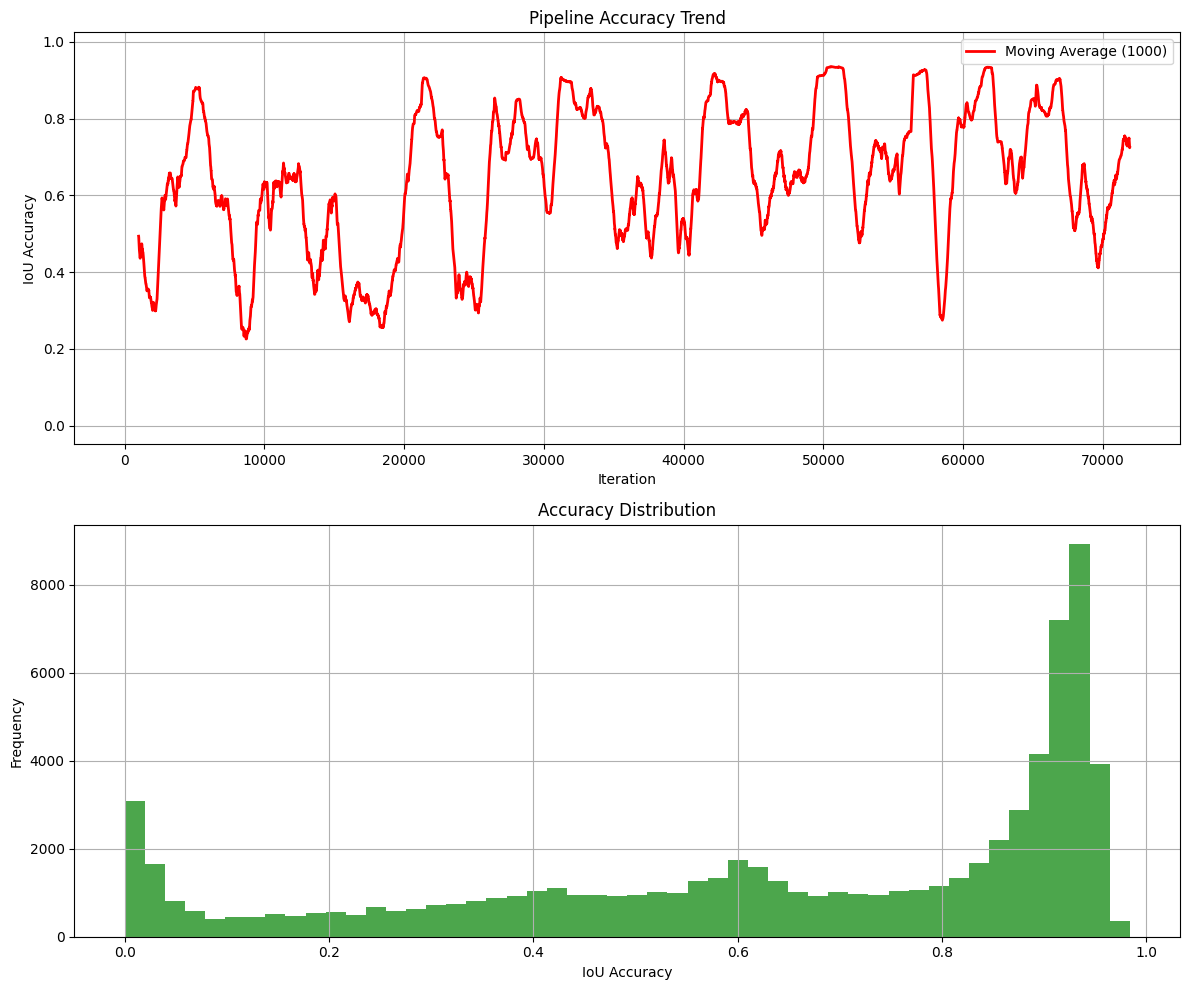

In [34]:
import csv
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracy():
    accuracies = []
    
    # Legge il file CSV
    try:
        with open("/home/vrlab/Scaricati/self_driving_vision_and_reconstruction/accuracy_log_pioggia.csv", "r") as file:
            reader = csv.reader(file)
            for row in reader:
                accuracies.append(float(row[0]))
    except FileNotFoundError:
        print("Nessun dato disponibile per il grafico.")
        return
    
    if not accuracies:
        print("Nessun dato valido per il grafico.")
        return

    # Convertiamo in numpy array per ottimizzare il calcolo
    accuracies = np.array(accuracies)

    # Calcola statistiche
    mean_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)
    
    # Mostra statistiche principali
    print(f"Accuratezza media: {mean_acc:.4f}")
    print(f"Deviazione standard: {std_acc:.4f}")

    # Campionamento per non avere troppi punti (prendiamo 1 ogni 50)
    sampled_accuracies = accuracies[::50]
    
    # Calcolo della media mobile su finestre di 1000 elementi
    window_size = 1000
    moving_avg = np.convolve(accuracies, np.ones(window_size)/window_size, mode='valid')

    # Creazione del grafico
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))


    # Plot with sampling
    axs[0].plot(range(1, len(sampled_accuracies) + 1), sampled_accuracies, linestyle='-', color='w', alpha=0)
    axs[0].plot(range(window_size, window_size + len(moving_avg)), moving_avg, color='r', linewidth=2, label="Moving Average (1000)")
    axs[0].set_xlabel("Iteration")
    axs[0].set_ylabel("IoU Accuracy")
    axs[0].set_title("Pipeline Accuracy Trend")
    axs[0].grid(True)
    axs[0].legend()

    # Histogram of accuracy distribution
    axs[1].hist(accuracies, bins=50, color='g', alpha=0.7)
    axs[1].set_xlabel("IoU Accuracy")
    axs[1].set_ylabel("Frequency")
    axs[1].set_title("Accuracy Distribution")
    axs[1].grid(True)

    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_accuracy()



In [9]:
# Leggi i dati dal file CSV
performance_data = pd.read_csv('performance_data_all.csv')

# Calcola il tempo totale impiegato in secondi
total_time_seconds = performance_data['Processing Time'].sum()

# Converti il tempo totale in minuti
total_time_minutes = total_time_seconds / 60

# Stampa il tempo totale in minuti
print(f"Tempo totale impiegato: {total_time_minutes:.2f} minuti")

Tempo totale impiegato: 1.21 minuti


In [2]:
import cv2

# Percorso del video di input
input_video_path = '/media/vrlab/video/video/temp_video_pioggia.mp4'
output_video_path = '/media/vrlab/video/video/temp_video_pioggia_r.mp4'

# Apri il video
cap = cv2.VideoCapture(input_video_path)

# Ottieni la frequenza dei fotogrammi (FPS) e la risoluzione del video
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Calcola i frame corrispondenti ai minuti 20 e 40
start_frame = int(20 * 60 * fps)  # 20 minuti in frame
end_frame = int(40 * 60 * fps)    # 40 minuti in frame

# Crea un oggetto VideoWriter per salvare il nuovo video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec per mp4
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Vai al frame di inizio (minuto 20)
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

# Estrai i fotogrammi dal video tra il minuto 20 e il minuto 40
while cap.isOpened():
    ret, frame = cap.read()
    current_frame = int(cap.get(cv2.CAP_PROP_POS_FRAMES))

    if not ret or current_frame > end_frame:
        break

    # Scrivi il fotogramma nel nuovo video
    out.write(frame)

# Rilascia le risorse
cap.release()
out.release()

print(f"Video salvato da minuto 20 a minuto 40 come '{output_video_path}'")


Video salvato da minuto 20 a minuto 40 come '/media/vrlab/video/video/temp_video_pioggia_r.mp4'


In [35]:
input_file = 'conda_requirements.txt'
output_file = 'requirements.txt'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        if not line.startswith('#') and line.strip():
            package_info = line.split()
            package = package_info[0]
            version = package_info[1] if len(package_info) > 1 else ''
            if version:
                outfile.write(f'{package}=={version}\n')
            else:
                outfile.write(f'{package}\n')


In [36]:
import cv2
import os
import random

# Funzione per estrarre frame casuali da un video
def extract_random_frames(video_path, output_folder, num_frames=10):
    # Assicurati che la cartella di output esista
    os.makedirs(output_folder, exist_ok=True)

    # Apri il video
    cap = cv2.VideoCapture(video_path)
    
    # Controlla se il video è stato aperto correttamente
    if not cap.isOpened():
        print(f"Errore: impossibile aprire il video {video_path}")
        return

    # Ottieni il numero totale di frame nel video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Totale frame nel video: {total_frames}")

    # Genera 10 frame casuali
    random_frame_indices = random.sample(range(total_frames), num_frames)

    for index in random_frame_indices:
        # Imposta il video al frame desiderato
        cap.set(cv2.CAP_PROP_POS_FRAMES, index)

        # Leggi il frame
        ret, frame = cap.read()
        if ret:
            # Salva il frame
            output_path = os.path.join(output_folder, f"frame_{index}.jpg")
            cv2.imwrite(output_path, frame)
            print(f"Frame salvato: {output_path}")
        else:
            print(f"Errore nel leggere il frame {index}")

    # Rilascia il video
    cap.release()

# Percorso del video e cartella di output
video_path = 'test_video\prova3.mp4'  # Modifica con il percorso del tuo video
output_folder = 'extracted_frames'  # Cartella dove salvare i frame estratti

# Esegui l'estrazione dei frame
extract_random_frames(video_path, output_folder)


Totale frame nel video: 750
Frame salvato: extracted_frames\frame_702.jpg
Frame salvato: extracted_frames\frame_725.jpg
Frame salvato: extracted_frames\frame_193.jpg
Frame salvato: extracted_frames\frame_54.jpg
Frame salvato: extracted_frames\frame_522.jpg
Frame salvato: extracted_frames\frame_575.jpg
Frame salvato: extracted_frames\frame_231.jpg
Frame salvato: extracted_frames\frame_62.jpg
Frame salvato: extracted_frames\frame_636.jpg
Frame salvato: extracted_frames\frame_234.jpg


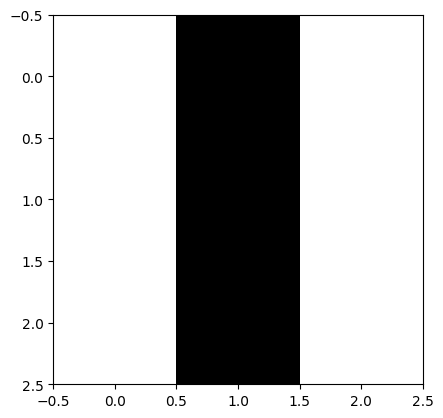

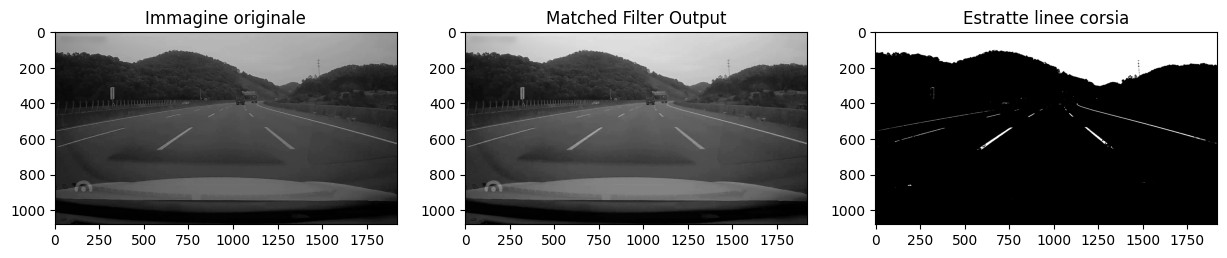

In [39]:

import cv2
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Carica l'immagine in scala di grigi
image = cv2.imread("Lane_detect/prova mix/advanced-lane-detection-for-self-driving-cars-master/frame_714.jpg", cv2.IMREAD_GRAYSCALE)

# Definisci il pattern per le linee verticali della corsia
pattern = np.array([
    [1, 0, 1],
    [1, 0, 1],
    [1, 0, 1]
])
plt.imshow(pattern, cmap="gray")

# Applica il filtro matched tramite convoluzione
matched_output = convolve2d(image, pattern, mode='same', boundary='symm')


# Normalizza l'output della convoluzione a 8 bit (0-255)
matched_output_normalized = cv2.normalize(matched_output, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Applica una soglia per ottenere una maschera binaria
_, binary_output = cv2.threshold(matched_output_normalized, 140, 255, cv2.THRESH_BINARY)

# Visualizza l'immagine originale, l'output del filtro e la maschera binaria
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Immagine originale")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Matched Filter Output")
plt.imshow(matched_output_normalized, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Estratte linee corsia")
plt.imshow(binary_output, cmap='gray')

plt.show()



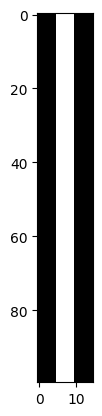

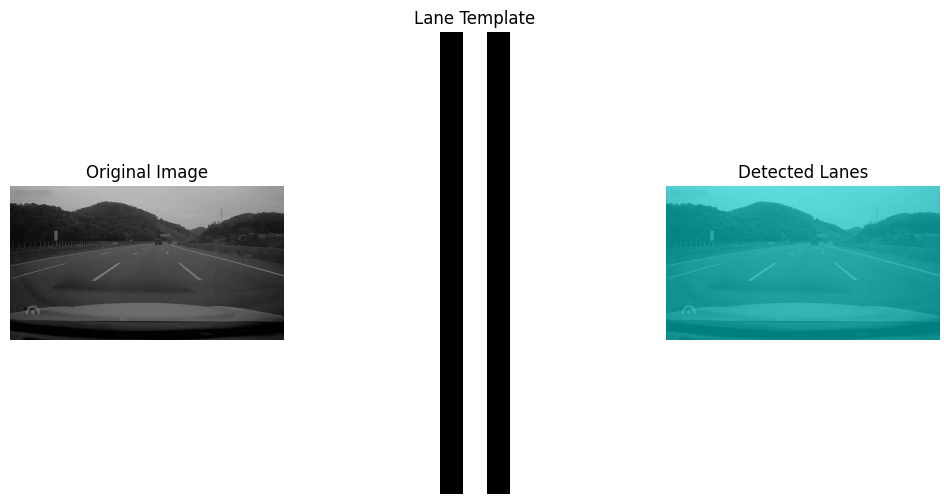

In [30]:
import cv2
import numpy as np
from scipy.signal import correlate2d
import matplotlib.pyplot as plt
 
# Load the highway image
image = cv2.imread("Lane_detect/prova mix/advanced-lane-detection-for-self-driving-cars-master/frame_714.jpg", cv2.IMREAD_GRAYSCALE)
 
# Create a synthetic lane-like template
template_width = 15   # Width of the lane marking in pixels
template_height = 100  # Height of the lane marking
template = np.zeros((template_height, template_width), dtype=np.float32)
template[:, template_width // 3 : template_width // 3 * 2] = 1  # Create a bright vertical line in the middle

# Normalize the template
template = (template - np.mean(template)) / np.std(template)
plt.imshow(template, cmap="gray")
 
# Apply matched filter using 2D cross-correlation
result = correlate2d(image, template, mode='same')
 
# Optional: Apply threshold to enhance lane markings
threshold = 0.7 * np.max(result)
matches = result > threshold
 
# Display results
plt.figure(figsize=(12, 6))
 
# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
 
# Template
plt.subplot(1, 3, 2)
plt.imshow(template, cmap="gray")
plt.title("Lane Template")
plt.axis("off")
 
# Matched filter result
plt.subplot(1, 3, 3)
plt.imshow(image, cmap="gray")
plt.imshow(matches, cmap="cool", alpha=0.5)  # Overlay detected lanes
plt.title("Detected Lanes")
plt.axis("off")
 
plt.show()

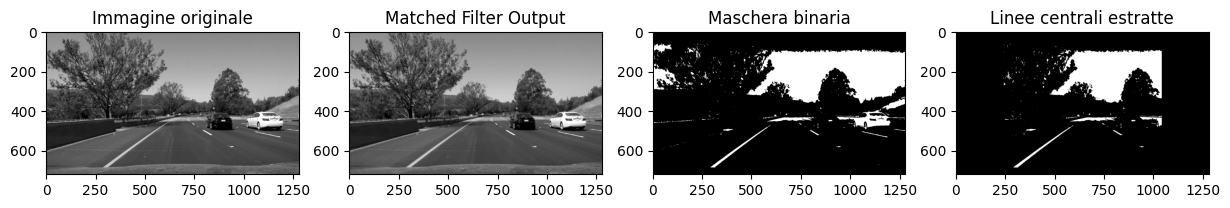

In [42]:
import cv2
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Carica l'immagine in scala di grigi
image = cv2.imread("self_driving_vision_and_reconstruction/extracted_frames/test6.jpg", cv2.IMREAD_GRAYSCALE)

# Definisci il pattern per le linee verticali della corsia
patterns = [
    np.array([
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1]
    ]),
    np.array([
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0]
    ]),
    np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])
]
# Inizializza l'output combinato
combined_output = np.zeros_like(image, dtype=float)
for pattern in patterns:
    matched_output = convolve2d(image, pattern, mode='same', boundary='symm')
    matched_output_normalized = cv2.normalize(matched_output, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Somma l'output normalizzato per ottenere un'immagine combinata
    combined_output += matched_output_normalized

# Applica il filtro matched tramite convoluzione
matched_output = convolve2d(image, pattern, mode='same', boundary='symm')

# Normalizza l'output della convoluzione a 8 bit (0-255)
matched_output_normalized = cv2.normalize(matched_output, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Applica una soglia per ottenere una maschera binaria
_, binary_output = cv2.threshold(matched_output_normalized, 150, 255, cv2.THRESH_BINARY)

# Calcola il centro dell'immagine
height, width = binary_output.shape
center_x = width // 2

# Crea un'immagine vuota per mantenere solo le linee centrali
central_output = np.zeros_like(binary_output)

# Soglia di larghezza dal centro (puoi modificarla)
width_threshold = 400  # Puoi modificare questo valore in base alle tue esigenze

# Itera sulle righe dell'immagine dal centro verso l'alto
for y in range(height - 1, -1, -1):  # Da bottom (height - 1) a top (0)
    # Controlla i pixel nella larghezza definita
    for x in range(center_x - width_threshold, center_x + width_threshold + 1):
        if 0 <= x < width:  # Assicurati che l'indice sia valido
            if binary_output[y, x] > 0:  # Se c'è un pixel bianco nella maschera binaria
                central_output[y, x] = 255  # Mantieni il pixel nel risultato centrale

# Visualizza l'immagine originale, l'output del filtro e la maschera binaria
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title("Immagine originale")
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("Matched Filter Output")
plt.imshow(matched_output_normalized, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("Maschera binaria")
plt.imshow(binary_output, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("Linee centrali estratte")
plt.imshow(central_output, cmap='gray')

plt.show()


In [22]:
import cv2
import numpy as np

def canny_edge_detection(image_path):
    # Carica l'immagine
    image = cv2.imread(image_path)
    if image is None:
        print("Immagine non trovata!")
        return

    # Converte l'immagine in scala di grigi
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Applica un filtro GaussianBlur per ridurre il rumore
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Esegui l'algoritmo di Canny per rilevare i bordi
    edges = cv2.Canny(blurred, 50, 150)

    # Mostra l'immagine originale e l'immagine con i bordi rilevati
    cv2.imshow('Original Image', image)
    cv2.imshow('Canny Edges', edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Esempio di utilizzo
canny_edge_detection('Lane_detect/prova mix/advanced-lane-detection-for-self-driving-cars-master/frame_714.jpg')


In [40]:
import cv2
import numpy as np
import math

def detect_lines_with_angle_filter(image_path, min_angle=20, max_angle=150):
    # Carica l'immagine
    image = cv2.imread(image_path)
    if image is None:
        print("Immagine non trovata!")
        return

    # Metti a nero i pixel sopra e sotto l'immagine
    image[0:200, :] = 0  # Nero sopra
    image[-100:, :] = 0  # Nero sotto

    # Disegna un punto rosso al centro in basso
    points = np.array([[130, 500], [480, 200], [650, 200], [1100, 500]], np.int32) 
    #points = np.array([[300, 600], [600, 450], [750, 450], [1000, 600]], np.int32) #test_6
    points = points.reshape((-1, 1, 2))

    # Converte l'immagine in scala di grigi
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Applica un filtro GaussianBlur per ridurre il rumore
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Esegui l'algoritmo di Canny per rilevare i bordi
    edges = cv2.Canny(blurred, 50, 150)

    # Usa la trasformazione di Hough per rilevare le linee
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/360, threshold=1, minLineLength=3, maxLineGap=10)

    # Crea una copia dell'immagine per disegnare le linee
    line_image = np.zeros_like(image)

    # Funzione per calcolare l'angolo di una linea
    def calculate_angle(x1, y1, x2, y2):
        angle = math.degrees(math.atan2((y2 - y1), (x2 - x1)))
        return abs(angle)

    # Disegna solo le linee con un angolo specifico
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                angle = calculate_angle(x1, y1, x2, y2)
                # Mantieni solo le linee con angoli compresi tra min_angle e max_angle
                if min_angle <= angle <= max_angle:
                    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)  # Verde

    # Crea una maschera nera della stessa dimensione dell'immagine
    mask = np.zeros_like(line_image)

    # Disegna il poligono bianco sulla maschera
    cv2.fillPoly(mask, [points], (255, 255, 255))  # Riempie il poligono di bianco sulla maschera
    

    # Applica la maschera sull'immagine originale
    masked_image = cv2.bitwise_and(line_image, mask)
    original_masked_image = cv2.bitwise_and(image, mask)
    cv2.imshow('Masked Image', original_masked_image)
    cv2.imwrite('./output_images/calib.png', original_masked_image)

    # Logica per trovare gli angoli
    def find_corners(mask):
        height, width = mask.shape[:2]
        top_left, top_right, bottom_left, bottom_right = None, None, None, None
        
        # Scorrimento dall'alto verso il basso per trovare gli angoli superiori
        for y in range(height):
            found_left = False  # Variabile per monitorare se è stato trovato l'angolo sinistro
            found_right = False  # Variabile per monitorare se è stato trovato l'angolo destro

            # Scorrimento da sinistra a destra
            for x in range(width):
                if mask[y, x, 0] != 0:  # Trovato un pixel verde
                    if top_left is None and x < width // 2:  # Angolo superiore sinistro
                        top_left = (x, y)
                        found_left = True  # Segna che è stato trovato l'angolo sinistro
                        break  # Esci dal ciclo interno una volta trovato

            # Scorrimento da destra a sinistra
            for x in range(width - 1, -1, -1):
                if mask[y, x, 0] != 0:  # Trovato un pixel verde
                    if top_right is None and x > width // 2:  # Angolo superiore destro
                        top_right = (x, y)
                        found_right = True  # Segna che è stato trovato l'angolo destro
                        break  # Esci dal ciclo interno una volta trovato

            # Se entrambi gli angoli superiori sono trovati, esci dal ciclo esterno
            if found_left and found_right:
                break

        # Scorrimento dal basso verso l'alto per trovare gli angoli inferiori
        for y in range(height - 1, -1, -1):
            found_left = False  # Variabile per monitorare se è stato trovato l'angolo sinistro
            found_right = False  # Variabile per monitorare se è stato trovato l'angolo destro

            # Scorrimento da sinistra a destra
            for x in range(width):
                if mask[y, x, 0] != 0:  # Trovato un pixel verde
                    if bottom_left is None and x < width // 2:  # Angolo inferiore sinistro
                        bottom_left = (x, y)
                        found_left = True  # Segna che è stato trovato l'angolo sinistro
                        break  # Esci dal ciclo interno una volta trovato

            # Scorrimento da destra a sinistra
            for x in range(width - 1, -1, -1):
                if mask[y, x, 0] != 0:  # Trovato un pixel verde
                    if bottom_right is None and x > width // 2:  # Angolo inferiore destro
                        bottom_right = (x, y)
                        found_right = True  # Segna che è stato trovato l'angolo destro
                        break  # Esci dal ciclo interno una volta trovato

            # Se entrambi gli angoli inferiori sono trovati, esci dal ciclo esterno
            if found_left and found_right:
                break

        return top_left, top_right, bottom_left, bottom_right


    # Trova gli angoli
    top_left, top_right, bottom_right, bottom_left = find_corners(mask)
    print("Angoli trovati: top_left:", top_left, "top_right:", top_right, "bottom_right:", bottom_right, "bottom_left:", bottom_left)
    corners = find_corners(mask)
    print("Angoli trovati:", corners)

    # Disegna gli angoli sull'immagine
    for corner in corners:
        if corner is not None:
            cv2.circle(masked_image, corner, 5, (255, 0, 0), -1)  # Cerchio rosso per gli angoli
            
    points = np.array([bottom_right,top_left, top_right, bottom_left], np.int32)
    #points = np.array([[300, 600], [600, 450], [750, 450], [1000, 600]], np.int32)
    
    #Primo angolo: (200, 400 (se aumentato scende verso il basso)) (in basso a sinistra)
    #Secondo angolo: (300, 200) (in alto a sinistra)
    #Terzo angolo: (600, 200) (in alto a destra)
    #Quarto angolo: (700, 400) (in basso a destra)

    # Disegna il poligono utilizzando i nuovi punti
    cv2.polylines(image, [points], isClosed=True, color=(255, 0, 0), thickness=3)
                
    

    # Mostra le immagini
    cv2.imshow('Original Image', image)
    cv2.imshow('Filtered Lines by Angle', masked_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Esempio di utilizzo
detect_lines_with_angle_filter('self_driving_vision_and_reconstruction/extracted_frames/frame_11.jpg')
#detect_lines_with_angle_filter('self_driving_vision_and_reconstruction/extracted_frames/test6.jpg')
#detect_lines_with_angle_filter('self_driving_vision_and_reconstruction/extracted_frames/test_6.jpg')


Angoli trovati: top_left: (480, 200) top_right: (650, 200) bottom_right: (130, 500) bottom_left: (1100, 500)
Angoli trovati: ((480, 200), (650, 200), (130, 500), (1100, 500))


In [25]:
import numpy as np
import cupy as cp
import time

# Dimensione dell'array
size = 10000

# Operazione su CPU con NumPy
a_cpu = np.random.rand(size, size)
b_cpu = np.random.rand(size, size)

start_cpu = time.time()
c_cpu = a_cpu + b_cpu
end_cpu = time.time()

print("Tempo di esecuzione su CPU:", end_cpu - start_cpu, "secondi")

# Operazione su GPU con CuPy
a_gpu = cp.random.rand(size, size)
b_gpu = cp.random.rand(size, size)

start_gpu = time.time()
c_gpu = a_gpu + b_gpu
cp.cuda.Stream.null.synchronize()  # Sincronizza per essere sicuri che l'operazione sia completata
end_gpu = time.time()

print("Tempo di esecuzione su GPU:", end_gpu - start_gpu, "secondi")


Tempo di esecuzione su CPU: 0.2714695930480957 secondi
Tempo di esecuzione su GPU: 0.20703458786010742 secondi
